## Take Home Challenge 2



## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
matplotlib.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
#reading the json data into pandas
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#overall view of the data.
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


This shows that some timestamps appears more than once going by the difference between unique counts and total counts

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
#checking if we have null values in the dataset
df.isnull().sum()

login_time    0
dtype: int64

In [7]:
#converting the dataset to time series format that can analyzed
ts = pd.DataFrame(np.arange(len(df)), index=df['login_time'], columns=['counts'])
ts.head()

,counts
login_time,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,1
1970-01-01 20:16:37,2
1970-01-01 20:16:36,3
1970-01-01 20:26:21,4


In [8]:
#converting frequency of time series to 15 mins 
ts2 = ts.resample('15T').count()
ts2.head()

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


To start off, we need to note that there are two types of time domain models:

- models that relate the present value of a series to past values and past prediction errors - these are called ARIMA models (for Autoregressive Integrated Moving Average).  
- ordinary regression models that use time indices as x-variables.  These are sometimes helpful for an initial description of the data and form the basis of several simple forecasting methods. The dataset provided is of this type.


It is also important to note that some important questions to first consider when first looking at a time series are:

- Is there a trend, meaning that, on average, the measurements tend to increase (or decrease) over time?
- Is there seasonality, meaning that there is a regularly repeating pattern of highs and lows related to calendar time such as seasons, quarters, months, days of the week, and so on?
- Are their outliers? In regression, outliers are far away from your line. With time series data, your outliers are far away from your other data.
- Is there a long-run cycle or period unrelated to seasonality factors?
- Is there constant variance over time, or is the variance non-constant?
- Are there any abrupt changes to either the level of the series or the variance?

Reference: https://onlinecourses.science.psu.edu/stat510/node/47

(array([ 719171.,  719185.,  719199.,  719213.,  719227.,  719241.,
         719255.,  719269.]), <a list of 8 Text xticklabel objects>)

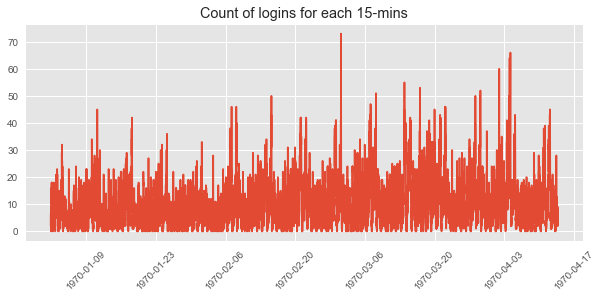

In [9]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(ts2.index, ts2.counts)
plt.title('Count of logins for each 15-mins')
plt.xticks(rotation=45)

From the above plot, we see the following:
- the time series spans a period of about 3.5 months from January 9, 1970 through April 17, 1970. 
- overall, there is no consistent upward or downward trend over the entire time span. The series appears to slowly wander up and down at some points and spike at others.  
- it difficult to tell if there is any seasonality in the data. Only way to tell that is by zooming into the time series
- it is possible we have one or two outliers that needs further investigation.
- It’s difficult to judge whether the variance is constant or not, except we zoom into the time series.
 

In [10]:
#i decided to create a function since the plotting of the graphs will be repetitive
def time_series(a):
    """this function creates the plot for different time 
      series cycles
    """
    xy = ts.resample(a).count()
    xy2= xy.head(7)
    fig, ax = plt.subplots(figsize=(10,4))
    plt.plot(xy.index, xy.counts)
    plt.title('Count of logins for each %s' %a)
    plt.xticks(rotation=45)
    print (xy2)    

                     counts
login_time                 
1970-01-01 20:00:00      24
1970-01-01 21:00:00       9
1970-01-01 22:00:00      21
1970-01-01 23:00:00      58
1970-01-02 00:00:00      53
1970-01-02 01:00:00      33
1970-01-02 02:00:00      43


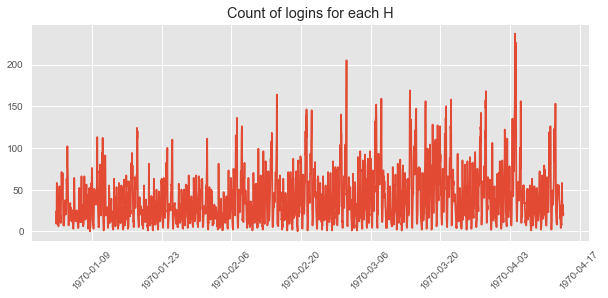

In [11]:
time_series('H')

This plot is about the same as the 15 mins login counts except that we are now beginning to see that outliers are now more obvious. 

            counts
login_time        
1970-01-01     112
1970-01-02     681
1970-01-03     793
1970-01-04     788
1970-01-05     459
1970-01-06     536
1970-01-07     648


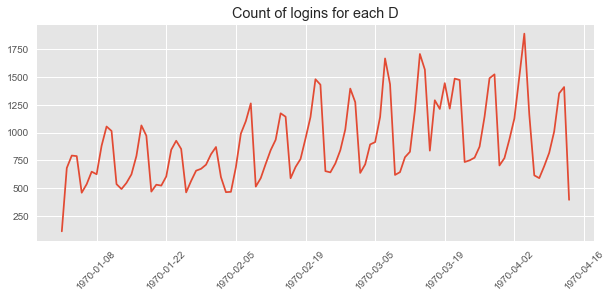

In [12]:
time_series('D')

Looking at the daily login counts above, we are now beginning to see some trends. Revisiting our checks, we see that:

- the plot increased sharply in the first week, and then gradually trended upward over the entire time span to some points before steeply declining afterward.
- there is now some seasonality in the data. The plot shows that during every two weeks period, we have two spikes each corresponding to about same time during the week. This probably need further investigation.
- it is still possible we have one or two outliers, but not very glaring as compared with the 15 minutes and hourly plot.
- we are now begining to see that variance of the login counts may not be constant overall. 


            counts
login_time        
1970-01-04    2374
1970-01-11    5217
1970-01-18    5023
1970-01-25    4751
1970-02-01    4744
1970-02-08    5572
1970-02-15    5915


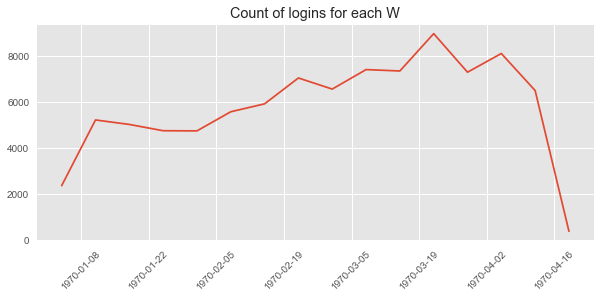

In [13]:
time_series('W')

The weekly plot further supports information seen in other plots that:

- the plot increased sharply in the first week, and then gradually trended upward over the entire time span to some points before steeply declining afterward.
- we are not able to see much about seasonality here.
- it is still possible we have one or two outliers, but not very glaring as compared with the 15 minutes and hourly plot.
- variance of the login counts may not be constant overall.

            counts
login_time        
1970-01-04    2374
1970-01-18   10240
1970-02-01    9495
1970-02-15   11487
1970-03-01   13589
1970-03-15   14736
1970-03-29   16240


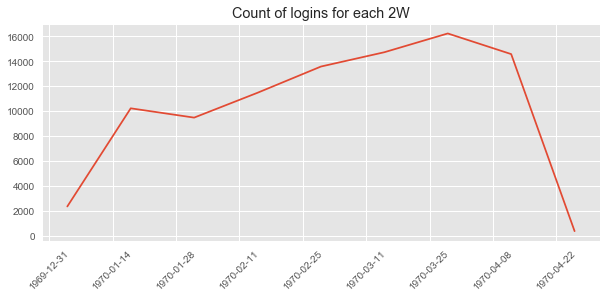

In [14]:
time_series('2W')

            counts
login_time        
1970-01-31   21239
1970-02-28   24673
1970-03-31   33723
1970-04-30   13507


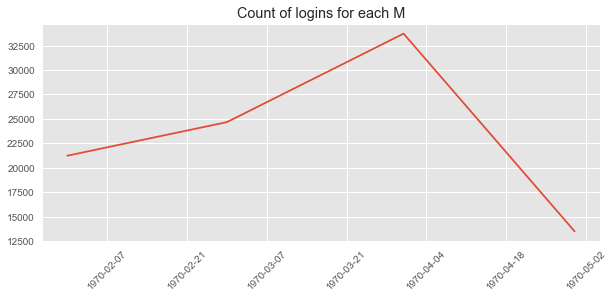

In [15]:
time_series('M')

Lumping up the 2 weeks and monthly charts together since they are providing about same information, we see:

- trend here is same with the daily and weekly plot, but much more obvious. 
- we are not able to see much about seasonality here.
- it is still possible we have one or two outliers, but not very glaring as compared with the 15 minutes and hourly plot.
- variance of the login counts may not be constant overall.

Having seen all the plots, I would say points that look interesting to me are the seasonalities and possibly the outliers. Zooming into the weekly plots to see why we have a spike in about same time during the week will probably provide more information.

In [16]:
#daily counts of a random two weeks period
cnt = ts.resample('D').count()
dly_two_wks = cnt['1970-02-05':'1970-02-18']

#daily counts of the first of the two weeks period
dly_frst_wk= cnt['1970-02-05':'1970-02-11']

#daily counts of the second of the two weeks period
dly_scnd_wk= cnt['1970-02-12':'1970-02-18']

(array([ 719199.,  719201.,  719203.,  719205.,  719207.,  719209.,  719211.]),
 <a list of 7 Text xticklabel objects>)

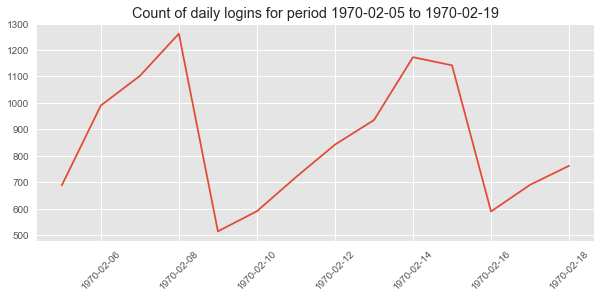

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(dly_two_wks.index, dly_two_wks.counts)
plt.title('Count of daily logins for period 1970-02-05 to 1970-02-19')
plt.xticks(rotation=45)

(array([ 719198.,  719199.,  719200.,  719201.,  719202.,  719203.,  719204.]),
 <a list of 7 Text xticklabel objects>)

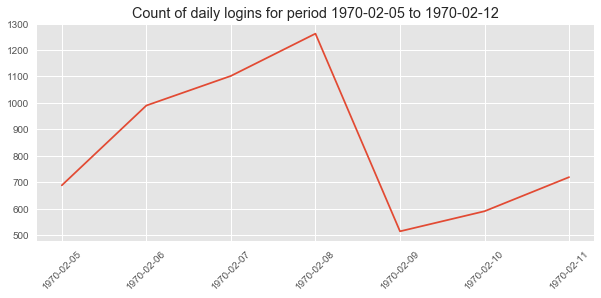

In [18]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(dly_frst_wk.index, dly_frst_wk.counts)
plt.title('Count of daily logins for period 1970-02-05 to 1970-02-12')
plt.xticks(rotation=45)

(array([ 719205.,  719206.,  719207.,  719208.,  719209.,  719210.,  719211.]),
 <a list of 7 Text xticklabel objects>)

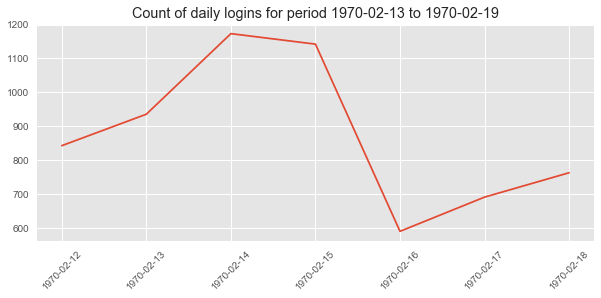

In [19]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(dly_scnd_wk.index, dly_scnd_wk.counts)
plt.title('Count of daily logins for period 1970-02-13 to 1970-02-19')
plt.xticks(rotation=45)

Based on the three plot above after zooming in on the weekly plots, we see that login counts sharply trends up from the start of the week hitting a high midweek (third or fourth day) and then steeply declines close to the end of week (fifth day) before rising again. Similar trends can be seen in all other weeks. So it suffices to say the following from this investigation:

- login counts sharply decline close to the end of each week (about fifth day of the week)
- login counts hits a peak midweek of each week (third or fourth day of the week)
- overall trend of login counts steady increases weekly as mentioned till hitting an overall high in the week beginning 1970-03-25 before sharply declining and continuing in same manner.
- I don't think the outlier(s) noticed in some of the plots are necessarily bad because the still follow the usual first two weekly pattern mentioned here. However, further investigation needs to be done as to why that happened in the week beginning 1970-04-02.




## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

## SOLUTION

**Number 1**

First off, most managers with the Ultimate managers not an exception only care about meeting an expected target based on business or operational goals. This sometimes could translates into revenue, meeting an expected service level or both. From the case study, Ultimate manager are much after meeting service level first, which could translate into revenue, and the driver partners are means to that end. The driver partners are the observational units. Measurements can be taken on them to achieve the goal or to test a procedure. The kind of measurements or variable one can collect from such drivers are thus:

1. id - Driver partner identification number (Int64)
2. cty - City driver is from (Binary variable: 1 for Ultimate Gotham and 0 for Ultimate Metropolis)
3. signup_dte - Sign-up date for driver in city he/she's from (YYYY MM DD: datetime)
4. last_trp_dte - Last trip date for driver to the other city (YYYY MM DD: datetime)
5. ave_dist - Average distance in miles per trip taken to other city in the fiscal quarter (float64)
6. num_trps - How many trips made to the other city within the quarter (Int64)
7. surge_pct - The percent of trips taken with surge multiplier > 1
8. avg_surge - The average surge multiplier over all of this user’s trips

Most of all these point to one thing - availability! Would the driver partner be available when either cities is active during the weekdays? If not, would waiving the toll fees incentivize them to be available? Since the case study specifically mentioned that the cities are most active at certain times than the other, and activities are normal over the weekend, i would think a surge parameter should be a good measure of success. So, question is, would driver partner be able to meet demand when we have a surge in activities? 



**Number 2**

If the dependent variable is percentage of trips taken with surge multiplier > 1, such that it is reasonably normally distributed and exists on an interval and the independent variable is time which has two levels that are repeated or matched, such as time before and after reimbursing all toll costs we can use a **paired-sample t-test** for the analysis. A paired-sample t-test is a one-sample t-test in disguise because it simply calculates the difference between paired observations (e.g., before and after) and then performs a 1-sample t-test on the differences.

- Ho = There are no significant differences in pre and post sample mean percentage of trips taken with surge in activities

- Ha = There are is a significant differences in pre and post sample mean percentage of trips taken with surge in activities

Based on the Staistical question and hypotheses above and the hypotheses below:

- The dependent variable must be continuous (interval/ratio).
- The observations are independent of one another.
- The dependent variable should be approximately normally distributed.
- The dependent variable should not contain any outliers.

we calculate a paired samples t-statics with the formula below

                   t = Summation(X1 - X2)/SE of the difference

where t is is the paired t-test value that follows a t distribution that is normal based on the CLT on the horizontal axis, and a probability density function on the vertical axis. This t-statistic correspond to a p-value on the y-axis.  X1 and X2 are the pre and post sample mean percentage of trips taken with surge in activities. And, SE is the Standard Error of the difference. SE is inversely proportional to t.

If the corresponsing p-value from the t-statics is less than the significant level of α = 0.05, we reject the null hypothesis Ho, concluding that there is a significant diffrences in the pre and post sample mean percentage of trips taken with surge in activities after toll costs were reimbursed. So it is advisable for Ultimate manager to keep waving these fees. However, if the p-value is greater than α = 0.05, then the reverse is the case.






## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

**Data description**
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [20]:
from pandas.io.json import json_normalize
#df2 = pd.read_json('ultimate_data_challenge.json', lines=True, orient=str)
js = json.load((open('ultimate_data_challenge.json')))
df2 = json_normalize(js)
df2.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0


In [21]:
#shows the rows and the number of predictors
df2.shape

(50000, 12)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [23]:
#another way to display the missing values
df2.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

What we have above shows we have some missing values for the variables "avg_rating_by_driver", "avg_rating_of_driver", and "phone." We will need to address later later before modeling our dataset. We also see that timeseries variables "last_trip_date" and "signup_date" were importing in by default as strings. It is needed to convert those to a datetime format that can easily be manipulated by Pandas.

### Computing the Descriptive Statistics and Some Initial Exploratory Data Analysis of the Dataset

In [24]:
df2.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


Note that the descriptive statistics above excludes the missing values and categorical variables. From the above we see that most of the variables are either right or left skewed. This can also be seen in the plot of the histogram below.

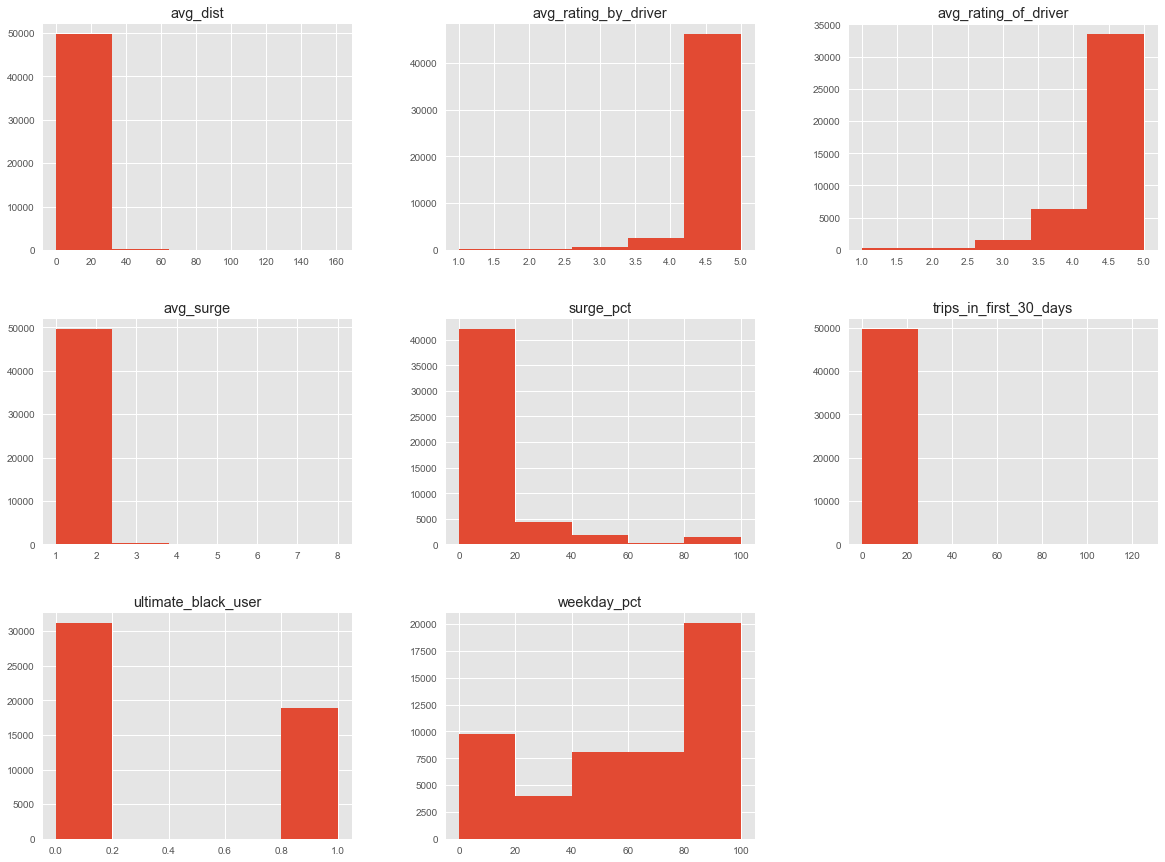

In [25]:
df2.hist(bins=5, figsize=(20,15))
plt.show()

Presence of skewness means that outliers are present in the variables affected as shown in the boxplots below. Outliers are not necessarily bad, but needs to be further investigating in relation to business objectives, required performance of the model and assumptions made about the dataset. Most times than not, this will need to be address if one is considering using a linear model to prevent negatively impacting outcomes of the model. 

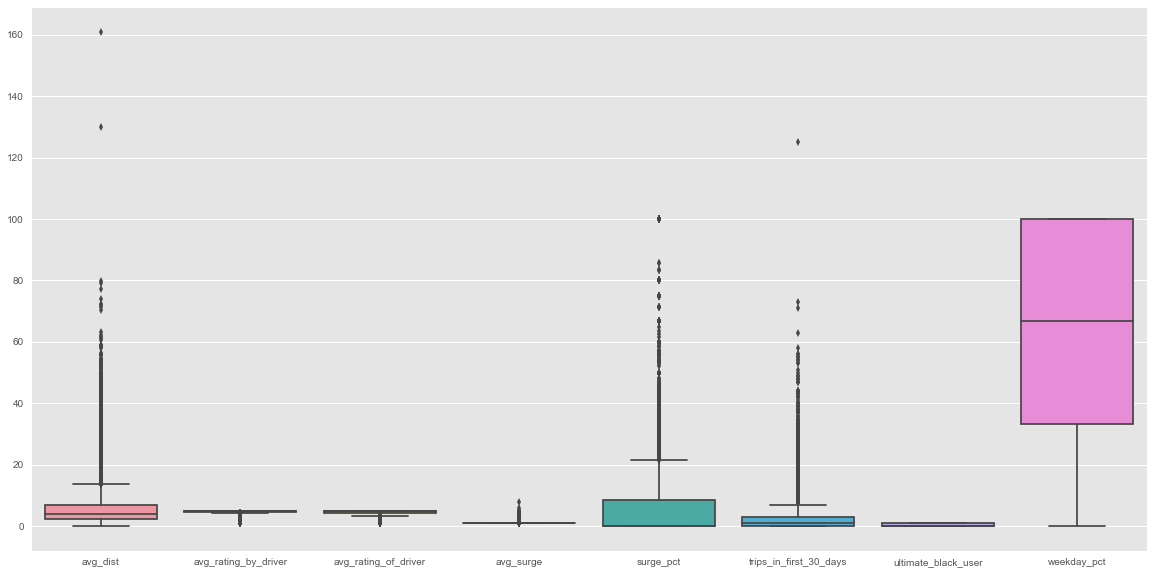

In [26]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1,1,1)
sns.boxplot(data= df2)

In [27]:
#Conversion of datetime variables to required format to enable analysis. This can also be done by setting the "parse_dates"  
#parameter to True when reading in the data 
df2['last_trip_date']= pd.to_datetime(df2['last_trip_date'])
df2['signup_date']= pd.to_datetime(df2['signup_date'])

In [28]:
#showing data types after conversion of the datetime variable.
df2.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                 bool
weekday_pct                      float64
dtype: object

### Feature Engineering

If the data was pulled several months later after user signed up in January 2014, it would make sense to use the last login date for all users as a reference to judge retained users, since a user is retained if they were “active” (i.e. took a trip) in the preceding 30 days at the time data was pulled. This is in terms of the maximum date in the dataset

In [29]:
from datetime import timedelta
from datetime import datetime

In [30]:
#last trip date for for all users.
max(df2['last_trip_date'])

Timestamp('2014-07-01 00:00:00')

In [31]:
#this is approximately 6 months after the very first initial signup date.
max(df2['last_trip_date']- df2['signup_date'])

Timedelta('181 days 00:00:00')

In [32]:
df2['active_user']=(max(df2['last_trip_date']) - df2['last_trip_date']) < timedelta(30)

In [33]:
#df3 = df2.drop(['signup_date', 'last_trip_date'], axis=1)
#df3.head()

In [34]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


In [35]:
df2['active_user'].value_counts()

False    31690
True     18310
Name: active_user, dtype: int64

In [36]:
#fraction of observed users retained is thus:
(df2[df2['active_user']==True]['active_user'].count())/len(df2)

0.36620000000000003

This shows approximately 37% of observed users were retained. 

In [37]:
#converting datetime format to unix time stamp
#courtesy: https://stackoverflow.com/questions/37192220/convert-date-time-format-to-unix-time-stamp-pandas
df2['signup_date']= df2['signup_date'].astype(np.int64) / 10**9
df2['last_trip_date']= df2['last_trip_date'].astype(np.int64) / 10**9

### Creating a Test Set

Since we now have a target variable, it is now advisable to create an out of sample test set data. It may sound strange to do that now, but this usually prevent what is called a data snooping bias. This is because the human brain is known to be an amazing pattern detection system, which means that it is highly prone to overfitting. So, we set the test set data aside that we will not touch at all, and continue with the training set data.

In [38]:
#here we are saying that we want the test data to be 20% of the full dataset, and the random_state is just setting a 
#random number generator's seed before creating the test set so that it always generates the same shuffled indices.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df2, test_size=0.2, random_state=42)

In [39]:
train_set.shape, test_set.shape

((40000, 13), (10000, 13))

In [40]:
#we create a copy of the train data we will work with
df2_copy = train_set.copy()

In [41]:
df2_copy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
39087,1.29,5.0,5.0,1.0,Winterfell,1.391213e+09,iPhone,1.391126e+09,0.0,1,True,100.0,False
30893,7.11,4.5,5.0,1.0,Winterfell,1.396570e+09,iPhone,1.390522e+09,0.0,1,False,100.0,False
45278,1.07,5.0,5.0,1.0,Winterfell,1.398902e+09,iPhone,1.388534e+09,0.0,2,True,100.0,False
16398,9.58,5.0,5.0,1.0,Astapor,1.389312e+09,Android,1.389139e+09,0.0,4,True,100.0,False
13653,40.24,5.0,5.0,1.0,Winterfell,1.389658e+09,iPhone,1.389658e+09,0.0,1,False,100.0,False


### Further Exploratory Data Analysis to Gain More Insights into the Dataset

Since the label or target variable is categorical, it wouldn't make sense to use a scatterplot to visualize relationship of such with other predictor variables. Scatterplot are better choice for visualizing association between continuous variables. Bar plots and/or boxplots are better choice for categorical variables. Since we already looked at those, another way to see any insights is by computing the Pearson's r - correlation as shown below.

In [42]:
#checking correlation of all features with the target variable - 'active_user'
corr_matrix = df2_copy.corr()
corr_matrix['active_user'].sort_values(ascending=False)

active_user               1.000000
last_trip_date            0.770605
trips_in_first_30_days    0.215767
ultimate_black_user       0.211103
weekday_pct               0.025238
surge_pct                 0.013223
avg_surge                -0.001096
avg_rating_of_driver     -0.009038
signup_date              -0.020889
avg_rating_by_driver     -0.026619
avg_dist                 -0.090713
Name: active_user, dtype: float64

We see that most predictors under consideration have either a weak positive or negative linear correlation with active user, except one - "last_trip_date." The closer the correlation values are to zero, the certainty it is that there is no linear correlation. When the values are closer to either 1 or -1, we have a strong positive linear correlation or strong negative linear correlation respectively. Further transformation of each variables, combining variables or use of a non-linear models may be needed. We can revisit this if model outcome is questionable for further tweaking.

### Data Cleaning

In [43]:
#showing that some of the variables in the training set have missing values
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 39087 to 15795
Data columns (total 13 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39843 non-null float64
avg_rating_of_driver      33506 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null float64
phone                     39682 non-null object
signup_date               40000 non-null float64
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
ultimate_black_user       40000 non-null bool
weekday_pct               40000 non-null float64
active_user               40000 non-null bool
dtypes: bool(2), float64(8), int64(1), object(2)
memory usage: 3.7+ MB


In [44]:
##showing that some of the variables in the test set have missing values
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 33553 to 5857
Data columns (total 13 columns):
avg_dist                  10000 non-null float64
avg_rating_by_driver      9956 non-null float64
avg_rating_of_driver      8372 non-null float64
avg_surge                 10000 non-null float64
city                      10000 non-null object
last_trip_date            10000 non-null float64
phone                     9922 non-null object
signup_date               10000 non-null float64
surge_pct                 10000 non-null float64
trips_in_first_30_days    10000 non-null int64
ultimate_black_user       10000 non-null bool
weekday_pct               10000 non-null float64
active_user               10000 non-null bool
dtypes: bool(2), float64(8), int64(1), object(2)
memory usage: 957.0+ KB


***Creating a balanced training set***

In [45]:
#this shows our training set is imbalanced, with more false than true
df2_train_copy = train_set.copy()
df2_train_copy['active_user'].value_counts()

False    25368
True     14632
Name: active_user, dtype: int64

We need to balance this dataset so that our model doesn't overfit to the dominant class in the labels.

In [46]:
df_majority = df2_train_copy[df2_train_copy['active_user'] == 0]
df_minority = df2_train_copy[df2_train_copy['active_user'] == 1]

In [47]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=25368,    # to match majority class
                                 random_state=123) # reproducible results

In [48]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [49]:
df_upsampled['active_user'].value_counts()

True     25368
False    25368
Name: active_user, dtype: int64

In [50]:
df_upsampled.shape

(50736, 13)

***Separating predictors from target variables***

In [51]:
#creating predictors and target variables for the train set
df2_train_copy = train_set.copy()
X_train = df_upsampled.drop('active_user', axis=1)
y_train = df_upsampled['active_user']

##creating predictors and target variables for the test set
df2_test_copy = test_set.copy()
X_test = df2_test_copy.drop('active_user', axis=1)
y_test = df2_test_copy['active_user']


#### Final data cleaning that Imputes missing values, hotcode categorical values and standardize the scale of continous variables*

If you look at the histogram plots we had earlier, we see that all the variables are not on same scale. It's always a good to have this because powers that be said it helps models perform better, especially linear models. Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. This is performed on continuous variables. There are two ways to do this: min-max scaling and standardization. I will be doing both here since some algorithms perform better with one than the other. Courtesy: Aurelien Geron book - Hands-On Machine Learning with Scikit-Learn & TensorFlow

In [52]:
cat_attribs = ['city', 'phone', 'ultimate_black_user']
num_attribs = list(X_train.drop(cat_attribs, axis=1))

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin
#this class was used to impute missing values
class DataFrameSelector(TransformerMixin):
    def __init__(self, attribute_names):        
        self.attribute_names = attribute_names
    def fit(self, X, y=None):      
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [54]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# This class is no available yet, but will be in Scikit-Learn 2.0.
#Thanks to Aurelien Geron for the info in his Hands-On Machine Learning with Scikit_Learn & TensorFlow book and blog

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [55]:
# importing necessary transformation modules 
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import CategoricalEncoder # coming in Scikit-Learn 2.0
from sklearn.preprocessing import Imputer

#setting up the pipeline for numerical variables
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)), ('imputer', Imputer(strategy="median")),
                        ('std_scaler', StandardScaler()),])

#setting up the pipeline for categorical variables
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)), 
                         ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),])

#combining both numerical and categorical pipelines
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline", num_pipeline),
                                                 ("cat_pipeline", cat_pipeline),])

In [56]:
#fitting the full pipeline to the training set
train_set_tr = full_pipeline.fit_transform(X_train.astype(str))
train_set_tr

array([[-0.79663711,  0.52549002,  0.6298692 , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.26232096, -0.64238835,  0.6298692 , ...,  1.        ,
         1.        ,  0.        ],
       [-0.83666645,  0.52549002,  0.6298692 , ...,  1.        ,
         0.        ,  1.        ],
       ..., 
       [-0.18346036,  0.52549002,  0.6298692 , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.2183002 ,  0.52549002,  0.6298692 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.30900694,  0.29191435,  0.27458368, ...,  1.        ,
         1.        ,  0.        ]])

In [57]:
train_set_tr.shape

(50736, 17)

In [58]:
#fitting the full pipeline to the test set
test_set_tr = full_pipeline.fit_transform(X_test.astype(str))
test_set_tr

array([[-0.40591943, -0.16822522, -1.46042922, ...,  1.        ,
         0.        ,  1.        ],
       [-0.44270553,  0.50783058,  0.27065502, ...,  1.        ,
         0.        ,  1.        ],
       [-0.20271999,  0.50783058,  0.61687187, ...,  1.        ,
         1.        ,  0.        ],
       ..., 
       [ 1.64008868,  0.50783058, -1.11421237, ...,  1.        ,
         1.        ,  0.        ],
       [-0.67042904, -0.39357715,  0.44376344, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.20367888, -0.16822522, -0.94110395, ...,  1.        ,
         1.        ,  0.        ]])

In [59]:
test_set_tr.shape

(10000, 17)

### Building and selecting the machine learning model

In [60]:
#importing 4 different classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [61]:
#instantiating the classifiers 
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

In [62]:
#aggregating the predictions of each classifier and predict the class that gets the most votes
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
voting_clf = VotingClassifier(estimators, voting='hard')
voting_clf.fit(train_set_tr, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [63]:
all_estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('vc', voting_clf)]

In [64]:
#let's check each classifier's accuracy on the test set.
#for some reason i was getting the error msg - AttributeError: 'LogisticRegression' object has no attribute '_class_', 
#so i switched imports to 'import sklearn.linear_model as lm' and that worked. 

from sklearn.metrics import accuracy_score
for name, clf in all_estimators:
    clf.fit(train_set_tr, y_train)
    y_pred = clf.predict(test_set_tr)
    print(name, accuracy_score(y_test, y_pred))

lr 0.929
rf 0.9276
svc 0.9257
vc 0.9289


The above results show that all our classiers did pretty well. I am surprised that Logistic Regression slightly out perform the Random Forest. That tells me standardizing the scale of all variables and balancing the dataset really helps in achieveing a great predictive power. I would have gone with any of the algorithms above, but choose to stick with Random Forest because of some issues seen in the exploratory data analysis - outliers and multicollinearity. Most times than not, industry arguments says ensemble algorithms like Random Forest:
1. handle well with outliers
2. are somewhat reburst against multicollinearity
3. rarely overfits

Having gotten above results by fitting all predictors, i will now check if selecting the most important predictors improves the result for Random Forest.

In [91]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

In [92]:
# Train the classifier
clf.fit(train_set_tr, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [93]:
#Print the name and gini importance of each feature
features_list = []
feature_imprt_list=[]
for feature, feature_imprt in zip(X_train.columns, clf.feature_importances_):
    features_list.append(feature)
    feature_imprt_list.append(feature_imprt)
    #print(feature)

In [68]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.01
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold=0.01, prefit=True) #prefit=True does exactly same as sfm.fit(train_set_tr, y_train)

In [69]:
#Print the name and gini importance of each feature
imprt_features = []
for feature_list_index in sfm.get_support(indices=True):
    if feature_list_index < len(X_train.columns):
        imprt_features.append(X_train.columns[feature_list_index])
print(imprt_features)

['avg_rating_by_driver', 'avg_surge', 'city', 'phone', 'surge_pct', 'ultimate_black_user']


In [70]:
feature_df = pd.DataFrame({'feature_name': features_list,'feature_imprt': feature_imprt_list})
feature_df

,feature_imprt,feature_name
0,0.004990,avg_dist
1,0.039984,avg_rating_by_driver
2,0.002995,avg_rating_of_driver
3,0.018621,avg_surge
4,0.824300,city
5,0.003070,last_trip_date
6,0.025736,phone
7,0.007397,signup_date
8,0.017226,surge_pct
9,0.004312,trips_in_first_30_days


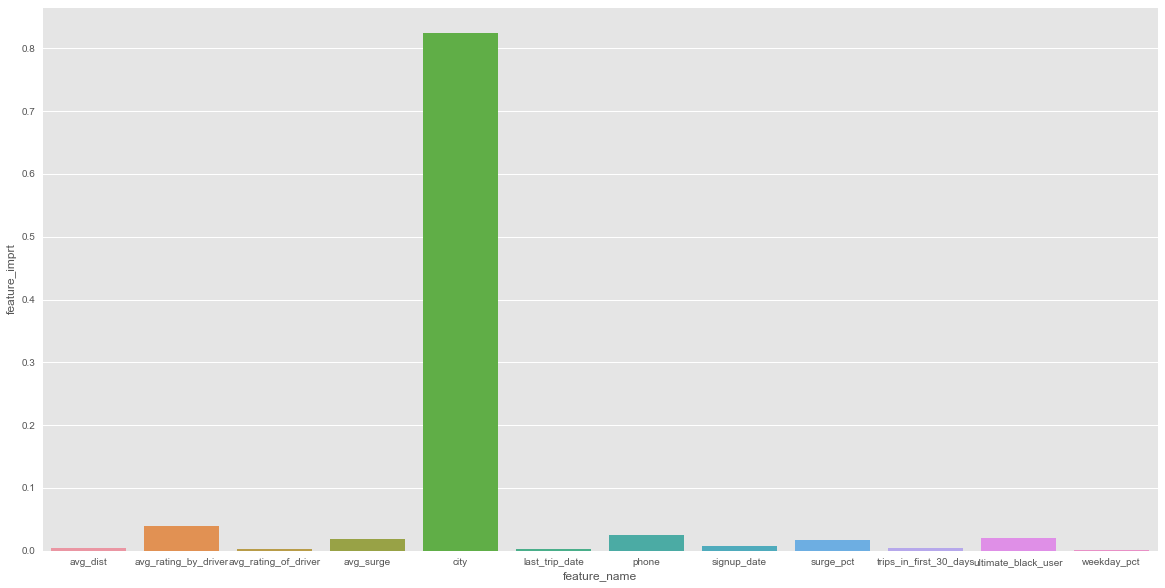

In [94]:
#plotting all features
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1,1,1)
sns.barplot(x='feature_name', y='feature_imprt', data= feature_df)
plt.show()

In [72]:
#plotting most important features
imprt_feature = feature_df[feature_df['feature_name'].isin(imprt_features)]
imprt_feature

,feature_imprt,feature_name
1,0.039984,avg_rating_by_driver
3,0.018621,avg_surge
4,0.824300,city
6,0.025736,phone
8,0.017226,surge_pct
10,0.020509,ultimate_black_user


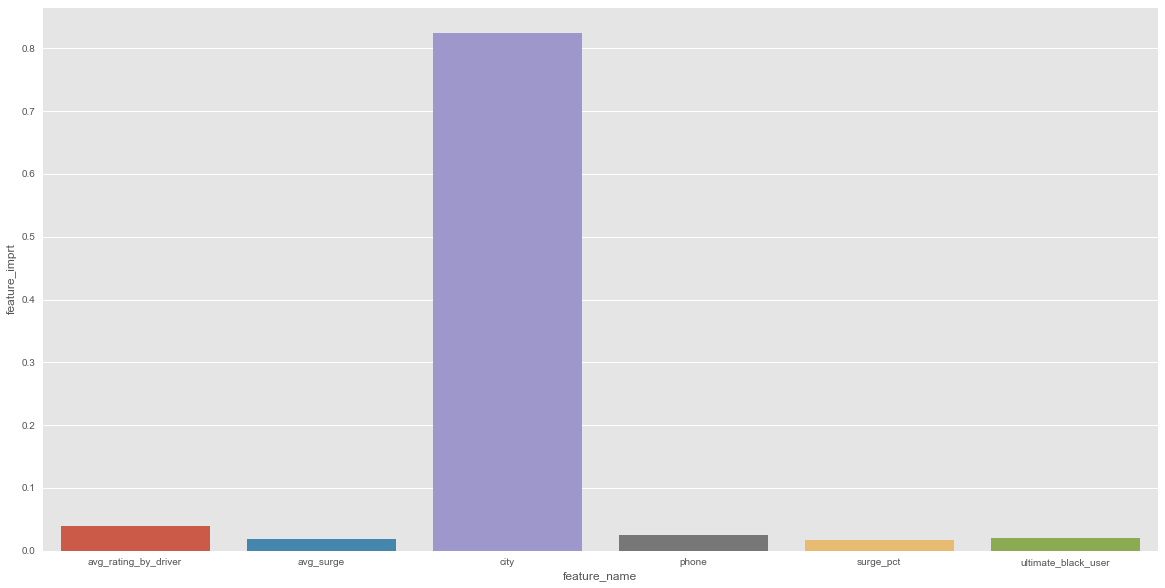

In [95]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1,1,1)
sns.barplot(x='feature_name', y='feature_imprt', data= imprt_feature)
plt.show()

***Creating a model with the most important features***

In [74]:
train_bal_imprt = df_upsampled.copy()[imprt_features]
train_bal_imprt.head()

,avg_rating_by_driver,avg_surge,city,phone,surge_pct,ultimate_black_user
39087,5.0,1.0,Winterfell,iPhone,0.0,True
30893,4.5,1.0,Winterfell,iPhone,0.0,False
45278,5.0,1.0,Winterfell,iPhone,0.0,True
16398,5.0,1.0,Astapor,Android,0.0,True
13653,5.0,1.0,Winterfell,iPhone,0.0,False


In [75]:
train_bal_imprt.shape

(50736, 6)

In [76]:
train_bal_imprt.dtypes

avg_rating_by_driver    float64
avg_surge               float64
city                     object
phone                    object
surge_pct               float64
ultimate_black_user        bool
dtype: object

In [77]:
#creating predictors and target variables for the train set
X_train2 = train_bal_imprt
y_train2 = df_upsampled['active_user']


In [78]:
cat_attribs2 = ['city', 'phone', 'ultimate_black_user']
num_attribs2 = ['avg_rating_by_driver', 'avg_surge', 'surge_pct']

In [79]:
#setting up the pipeline for numerical variables
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs2)), ('imputer', Imputer(strategy="median")),
                        ('std_scaler', StandardScaler()),])

#setting up the pipeline for categorical variables
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs2)), 
                         ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),])

#combining both numerical and categorical pipelines
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline", num_pipeline),
                                                 ("cat_pipeline", cat_pipeline),])

In [80]:
#fitting the full pipeline to the training set
train_set_tr2 = full_pipeline.fit_transform(X_train2.astype(str))
train_set_tr2

array([[ 0.52549002, -0.34873707, -0.46667145, ...,  1.        ,
         0.        ,  1.        ],
       [-0.64238835, -0.34873707, -0.46667145, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.52549002, -0.34873707, -0.46667145, ...,  1.        ,
         0.        ,  1.        ],
       ..., 
       [ 0.52549002, -0.34873707, -0.46667145, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.52549002, -0.34873707, -0.46667145, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.29191435, -0.34873707, -0.46667145, ...,  1.        ,
         1.        ,  0.        ]])

In [81]:
train_set_tr2.shape, y_train.shape, test_set_tr.shape, y_test.shape

((50736, 11), (50736,), (10000, 17), (10000,))

In [82]:
#building the model from the important features
imprt_rf = RandomForestClassifier()
imprt_rf.fit(train_set_tr2, y_train)

#predicting the model from the important features
y_pred = rnd_clf.predict(test_set_tr)

#printing the accuracy scores
print(accuracy_score(y_test, y_pred))


0.9276


We see above that there is no difference in accuracy using the important features. The only reason one may go with the important features is to reduce the dimention of the overall model, in the sense that if one can get the same result with less, then it is better to go with that.

### Cross-validating our Model

In [83]:
import sklearn.model_selection as ms

ms.cross_val_score(imprt_rf, train_set_tr2, y_train, cv = ms.StratifiedKFold(shuffle = True))

array([ 0.76602412,  0.7695719 ,  0.77164144])

In [84]:
ms.cross_val_score(imprt_rf, train_set_tr2, y_train, cv = ms.StratifiedKFold(shuffle = False))

array([ 0.76903974,  0.76259461,  0.76773888])

In [85]:
ms.cross_val_score(imprt_rf, train_set_tr2, y_train, cv = ms.KFold(shuffle = True))

array([ 0.76874409,  0.76655629,  0.76744324])

In [86]:
ms.cross_val_score(imprt_rf, train_set_tr2, y_train, cv = ms.KFold(shuffle = False))

array([ 0.42218543,  0.76838931,  0.50644513])

At this point, we see that our model is greatly overfitting. This is after having all variables on the same standardized scale. Besides the dataset being imbalanced and having outliers that are causing skewness, there is a dominant feature ('city') that is tilting the pendulum. Possible solutions for the overfitting are to simplify the model, constrain it(i.e., regularize it), or get a lot more training data.

### Checking for the model performance

In [87]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
#plot_confusion_matrix(confusion_mat)

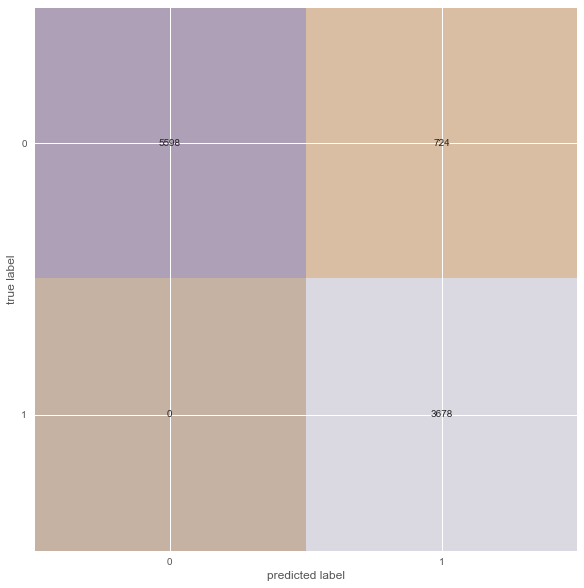

In [88]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_mat, figsize= [10, 10], cmap='PuOr')
plt.show()

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm rider retention (again, a few sentences will suffice).

***Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.***

- My first approach was to engineer a feature based on the business requirement at the time the data was pulled. Based on estimation, we see data was pulled on or after about 181 days, which was the last day a user accessed the platform. This works since a user is retained if they were active 30days before the day was pulled. With that, it shows approximately 37% of observed users were retained.

- Second, i made sure my test dataset was created at the beginning of my analysis. It may sound strange, but this works because it usually prevent what is called data snooping bias. This is because the human brain is known to be an amazing pattern detection system, which means that it is highly prone to overfitting. So, we set the test set data aside that we will not touch at all, and continue with the training set data. This helps us validate if our models generalizes well to out of sample dataset.

- Third, all the predictors were standardized by evaluating them on the same scale because it is known that machine learning algorithms don't perform well when the input numerical attributes have different scales. This also help comparison across multiple dimensions and domains.

- Last, i ensured to compare multiple machine learning algorithms to see which performs better, and also tried aggregating their overall performance using a voting classifier to see if results improve. This in most cases improves results of outcomes.


This model did not seem to generalize well to an out of sample data. It was really overfitting, partly due to the dataset being imbalance, having outliers that are causing skewness, and a dominant feature ('city') that is possibly causing noise and tilting the prediction pendulum. One should not necessarily remove outliers or tweak features without a better understanding of business objective. This is highly required in this case. Other solutions is to simplify the model, constrain it(i.e., regularize it), or get a lot more training data.



***Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).***

The important features from the model should be a guide. Overall, city of the riders is the most important feature. It is stumps all other features by a mile. This is usually a problem because this can dominate outcomes in analysis. One has to ask if this is a composite variable or if there are other confounding factors. Are riders influenced by other factors in the city that we don't know? There are lot of questions or missing data here. Ultimate should investigate further by randomly surving the riders. 

The variance of other predictors - 'avg_rating_by_driver', 'avg_surge', 'city', 'phone', 'surge_pct', 'ultimate_black_user', are much normal and fall within expected range. Ultimate should investigate surges in the cities to know if there is need to increase service level to meet such demands. They should also track any issues with phone ride reservations either using apps on cell phones or via calls. This analysis also shows riders would probably stop using the service when they get a bad rating from drivers, so Ultimate needs to throw caution to drivers on that. Last, Ultimate should look closely at African descendent demography because that could impact revenue. Is this associated with socio-economic status or historical in nature. One really can't tell from the information provided, so more investigation is needed. 
